# Kaggle sentiment-analysis-on-movie-reviews
https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

In [3]:
path = Config.data_path()/'rotten-tomatos-sentiment-analysis'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/storage/rotten-tomatos-sentiment-analysis')

In [16]:
! kaggle competitions download -c sentiment-analysis-on-movie-reviews -p {path} 
! unzip -q -n {path}/test.tsv.zip -d {path}
! unzip -q -n {path}/train.tsv.zip -d {path}

test.tsv.zip: Skipping, found more recently modified local copy (use --force to force download)
sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.tsv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [17]:
! ls {path}

sampleSubmission.csv  test.tsv	test.tsv.zip  train.tsv  train.tsv.zip


In [4]:
import pandas as pd

In [21]:
pd.read_csv(path/'train.tsv', sep='\t')

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [4]:
bs = 48
data_lm = load_data('/notebooks/course-v3/nbs/dl1/data/imdb', 'data_lm.pkl', bs=bs)

In [41]:
data = (TextList.from_csv(path, csv_name='train.tsv', delimiter='\t', cols='Phrase', vocab=data_lm.vocab)
             .split_by_rand_pct(0.2)
             .label_from_df(cols=3)
             .databunch(bs=bs))

In [44]:
data.save('data.pkl')

In [5]:
data = load_data(path, 'data.pkl', bs=bs)

In [42]:
data.show_batch()

text,target
"xxbos reminds us how realistically nuanced a xxmaj robert xxmaj de xxmaj niro performance can be when he is not more xxunk engaged in the shameless self - caricature of ` xxmaj analyze xxmaj this ' xxup xxunk 1999 xxup xxunk and ` xxmaj analyze xxmaj that , ' promised xxup xxunk or threatened xxup xxunk for later this year .",2
"xxbos xxmaj while there 's likely very little crossover appeal to those without much interest in the xxmaj xxunk xxup xxunk as well as rank frustration from those in the know about xxmaj xxunk 's dumbed - down tactics xxup xxunk , xxmaj much xxmaj ado xxmaj about xxmaj something is an amicable endeavor .",3
"xxbos xxmaj some of the most ravaging , gut - wrenching , frightening war scenes since xxunk xxmaj saving xxmaj private xxmaj ryan '' have been recreated by xxmaj john xxmaj woo in this little - known story of xxmaj native xxmaj americans and their role in the second great war .",3
"xxbos by the time it 's done with us , xxmaj mira xxmaj nair 's new movie has its audience giddy with the delight of discovery , of having been immersed in a foreign culture only to find that human nature is pretty much the same all over .",4
"xxbos xxmaj stephen xxmaj xxunk 's documentary is a decomposition of healthy eccentric inspiration and ambition -- wearing a cloak of unsentimental , straightforward text -- when it 's really an exercise in gross xxunk of the delusional personality type .",1


In [6]:
learn = text_classifier_learner(data, AWD_LSTM, drop_mult=0.5)

In [8]:
#! cp /notebooks/course-v3/nbs/dl1/data/imdb/models/fine_tuned_enc.pth {path}/models/fine_tuned_enc.pth

In [7]:
learn.load_encoder('fine_tuned_enc')

In [53]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


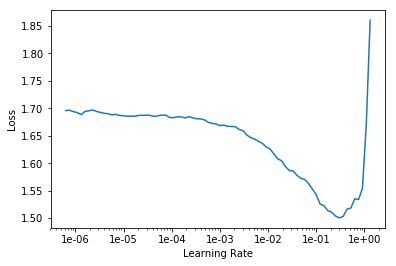

In [54]:
learn.recorder.plot()

In [59]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.074871,0.944552,0.612553,00:55


In [57]:
learn.save('first')

In [58]:
learn.load('first')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (124848 items)
x: TextList
xxbos a series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .,xxbos a series of escapades demonstrating the adage that what is good for the goose,xxbos a series,xxbos a,xxbos series
y: CategoryList
1,2,2,2,2
Path: /storage/rotten-tomatos-sentiment-analysis;

Valid: LabelList (31212 items)
x: TextList
xxbos how xxmaj john xxmaj malkovich 's reedy xxunk will pronounce his next line,xxbos very strong,xxbos that 's been acted out,xxbos a subzero version of xxmaj monsters , xxmaj inc. ,,xxbos unimaginable
y: CategoryList
2,3,2,2,1
Path: /storage/rotten-tomatos-sentiment-analysis;

Test: None, model=SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(60003, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(6000

In [60]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.952728,0.940649,0.645617,01:03


In [61]:
learn.save('second')

In [62]:
learn.load('second')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (124848 items)
x: TextList
xxbos a series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .,xxbos a series of escapades demonstrating the adage that what is good for the goose,xxbos a series,xxbos a,xxbos series
y: CategoryList
1,2,2,2,2
Path: /storage/rotten-tomatos-sentiment-analysis;

Valid: LabelList (31212 items)
x: TextList
xxbos how xxmaj john xxmaj malkovich 's reedy xxunk will pronounce his next line,xxbos very strong,xxbos that 's been acted out,xxbos a subzero version of xxmaj monsters , xxmaj inc. ,,xxbos unimaginable
y: CategoryList
2,3,2,2,1
Path: /storage/rotten-tomatos-sentiment-analysis;

Test: None, model=SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(60003, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(6000

In [63]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.908944,0.882339,0.661765,01:29


In [64]:
learn.save('third')

In [10]:
learn.load('third')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (124848 items)
x: TextList
xxbos a series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .,xxbos a series of escapades demonstrating the adage that what is good for the goose,xxbos a series,xxbos a,xxbos series
y: CategoryList
1,2,2,2,2
Path: /storage/rotten-tomatos-sentiment-analysis;

Valid: LabelList (31212 items)
x: TextList
xxbos how xxmaj john xxmaj malkovich 's reedy xxunk will pronounce his next line,xxbos very strong,xxbos that 's been acted out,xxbos a subzero version of xxmaj monsters , xxmaj inc. ,,xxbos unimaginable
y: CategoryList
2,3,2,2,1
Path: /storage/rotten-tomatos-sentiment-analysis;

Test: None, model=SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(60003, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(6000

In [11]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.865810,0.818252,0.669742,02:10
1,0.842884,0.825188,0.672049,02:11


In [12]:
learn.save('forth')

In [13]:
learn.export()

In [14]:
test = TextList.from_csv(path, csv_name='test.tsv', delimiter='\t', cols='Phrase')

In [17]:
db=test.databunch()

Exception: Your data is neither split nor labeled, can't turn it in a `DataBunch` yet.

In [9]:
learn = load_learner(path, test=test)

In [10]:
preds, y = learn.get_preds(ds_type=DatasetType.Test)

In [11]:
len(preds)

66292

In [34]:
preds[0]

tensor([0.0477, 0.6304, 0.2829, 0.0269, 0.0121])

In [21]:
learn.data.test_ds

TypeError: 'method' object is not subscriptable

In [46]:
sentiments = [pred.argmax().item() for pred in preds]

In [55]:
sentiments[1]

1

In [50]:
submission = pd.read_csv('sampleSubmission.csv');submission.head()

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2


In [52]:
submission['Sentiment'] = sentiments

In [53]:
submission.head()

,PhraseId,Sentiment
0,156061,1
1,156062,1
2,156063,3
3,156064,3
4,156065,3


In [57]:
submission.to_csv(path/'submission.csv', index=False)

In [58]:
! kaggle competitions submit sentiment-analysis-on-movie-reviews -f {path/'submission.csv'} -m "My submission"

100%|█████████████████████████████████████████| 583k/583k [00:00<00:00, 771kB/s]
Successfully submitted to Sentiment Analysis on Movie Reviews

some sanity tests

In [59]:
classes = ['negative', 'somewhat negative', 'neutral', 'somewhat positive', 'positive']

In [67]:
classes[learn.predict('I really love it')[1].item()]

'positive'

In [68]:
classes[learn.predict('I really dont like it')[1].item()]

'somewhat negative'

In [69]:
classes[learn.predict('I very dissapointed with that')[1].item()]

'somewhat negative'

In [70]:
classes[learn.predict('Simply the best')[1].item()]

'positive'